In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [48]:
df = pd.read_csv('cleaned_public_policy.csv',)

In [49]:
# Load CPI table and calculate yearly CPI
cpi_df = pd.read_csv('datasets/cpi.csv')
avg_cpi = cpi_df.groupby('Year').mean().reset_index()

In [50]:
## Classify the columns depending on categorical or non-categorical
cat_cols = ['Private_Fair_Housing','No_Discrimination_Laws',
             'Public_Fair_Housing','Urban_Fair_Housing',
             'Banned_Discrimination_Public_Housing',
             'Banned_Discrimination_Private_Housing',
             'Legislation_Public_Housing','Rent_Control',
             'State_Aid_Allowed','Federal_Aid_Allowed','Prohibit_Rent_Control']
df[cat_cols] = df[cat_cols].astype('category')
df['Year'] = pd.to_datetime(df['Year']).dt.year

non_cat_cols = df.columns.difference(cat_cols +['Year','State','Number_Interest_Groups','Property_Rights'])


In [26]:
non_cat_cols

Index(['Community_Spending', 'Govt_Direct_Expenditure',
       'Housing_Prices_Quarter', 'Unexpected_Housing_Spending'],
      dtype='object')

## Correcting for Inflation using CPI Data

In [53]:
#Find the dates that are not in the CPI but are in the public policy csv and interpolate to estimate the CPI
df['CPI_value'] = pd.merge(avg_cpi,df['Year'],how='right')['Value']
df['CPI_value'].fillna(method='backfill',inplace=True)

Text(0.5, 1.0, 'CPI value')

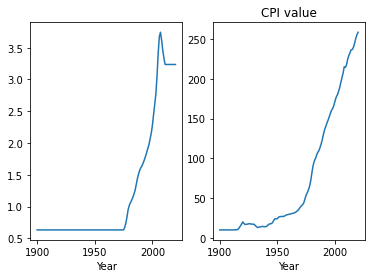

In [56]:
fig,ax = plt.subplots(nrows=1,ncols=2)
df.groupby('Year')['Housing_Prices_Quarter'].mean().plot(ax=ax[0])
plt.title('Housing Prices')
df.groupby('Year')['CPI_value'].mean().plot(ax=ax[1])
plt.title('CPI value')

In [28]:
(df[df['Year'] == 1980][non_cat_cols]).describe()

,Community_Spending,Govt_Direct_Expenditure,Housing_Prices_Quarter,Unexpected_Housing_Spending
count,50.000000,50.000000,50.000000,50.000000
mean,0.002504,119.049540,1.021660,0.000193
std,0.001614,186.479494,0.026817,0.001560
min,0.000468,4.736000,0.900650,-0.002531
25%,0.001543,23.946500,1.007194,-0.000590
50%,0.002054,57.915500,1.017375,0.000034
75%,0.003101,143.113250,1.038275,0.000758
max,0.009926,1101.234000,1.080025,0.006125


In [29]:
#Adjust for CPI and drop the CPI value
df[non_cat_cols]= df[non_cat_cols].div(df['CPI_value'],axis=0).mul(100,axis=0)
df.drop('CPI_value',axis=1,inplace=True)

print(avg_cpi[avg_cpi['Year'] == 1980]['Value'].iloc[0])
(df[df['Year'] == 1980][non_cat_cols]).describe()

82.40833333333333


,Community_Spending,Govt_Direct_Expenditure,Housing_Prices_Quarter,Unexpected_Housing_Spending
count,50.000000,50.000000,50.000000,50.000000
mean,0.003038,144.462987,1.239753,0.000234
std,0.001958,226.287180,0.032542,0.001893
min,0.000568,5.746992,1.092911,-0.003072
25%,0.001872,29.058348,1.222199,-0.000717
50%,0.002492,70.278693,1.234554,0.000041
75%,0.003764,173.663566,1.259915,0.000919
max,0.012045,1336.313884,1.310577,0.007432


In [30]:
print(df.dtypes)
df.head(5)

Year                                        int64
State                                      object
Housing_Prices_Quarter                    float64
Community_Spending                        float64
Unexpected_Housing_Spending               float64
Govt_Direct_Expenditure                   float64
Property_Rights                           float64
Number_Interest_Groups                    float64
No_Discrimination_Laws                   category
Private_Fair_Housing                     category
Public_Fair_Housing                      category
Urban_Fair_Housing                       category
Banned_Discrimination_Public_Housing     category
Banned_Discrimination_Private_Housing    category
Legislation_Public_Housing               category
Rent_Control                             category
State_Aid_Allowed                        category
Federal_Aid_Allowed                      category
Prohibit_Rent_Control                    category
dtype: object


,Year,State,Housing_Prices_Quarter,Community_Spending,Unexpected_Housing_Spending,Govt_Direct_Expenditure,Property_Rights,Number_Interest_Groups,No_Discrimination_Laws,Private_Fair_Housing,Public_Fair_Housing,Urban_Fair_Housing,Banned_Discrimination_Public_Housing,Banned_Discrimination_Private_Housing,Legislation_Public_Housing,Rent_Control,State_Aid_Allowed,Federal_Aid_Allowed,Prohibit_Rent_Control
0,1900,AK,6.663744,0.008723,-0.002502,5.959528,0.045116,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0
1,1901,AK,6.663744,0.008723,-0.002502,5.959528,0.045116,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0
2,1902,AK,6.663744,0.008723,-0.002502,5.959528,0.045116,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0
3,1903,AK,6.663744,0.008723,-0.002502,5.959528,0.045116,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0
4,1904,AK,6.663744,0.008723,-0.002502,5.959528,0.045116,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0


## Primary Goals for EDA:
1) Identify the distribution of housing prices across different states
2) Identify if the categorical data is correlated - I imagine "liberal" states will have more housing protections and thus these housing protections will be correlated.
3) Observe if we can summarize data across time: i.e., is there a particular time point in which housing policies were passed?

In [31]:
rent_control_states = ['CA','MD','NJ','NY']
non_rent_control_states = set(df['State'].unique()) - set(rent_control_states)

In [32]:
df.corr()[['Housing_Prices_Quarter','Govt_Direct_Expenditure']]

,Housing_Prices_Quarter,Govt_Direct_Expenditure
Year,-0.868271,0.293669
Housing_Prices_Quarter,1.000000,-0.119935
Community_Spending,0.393757,0.098187
Unexpected_Housing_Spending,0.013110,0.241699
Govt_Direct_Expenditure,-0.119935,1.000000
Property_Rights,-0.030934,-0.414526
Number_Interest_Groups,-0.159921,0.516039


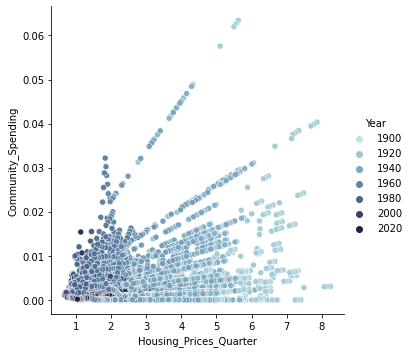

In [18]:
cmap=sns.cubehelix_palette(rot=-.2, as_cmap=True)
sns.relplot(data = df, x = 'Housing_Prices_Quarter',y = 'Community_Spending',hue='Year',palette=cmap,sizes=(10,200))

Text(0.5, 1.0, 'Housing Prices per State')

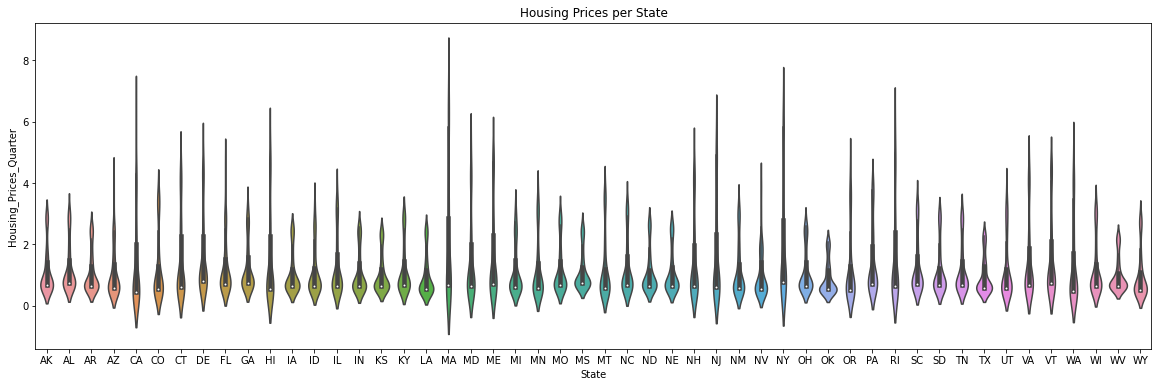

In [63]:
plt.figure(figsize=(20,6))
sns.violinplot(x = 'State',y = 'Housing_Prices_Quarter', data = df)
plt.title('Housing Prices per State')

In [33]:
years_of_change = pd.DataFrame(columns=['state','policy','year'])
for st_name,st_df in df.groupby('State'):
    for col in cat_cols:
        this_yr = st_df[st_df[col] != st_df[col].shift(-1)]['Year'].values[0]
        years_of_change = years_of_change.append({'state':st_name,'policy':col,'year':this_yr},ignore_index=True)        
years_of_change.drop(years_of_change[years_of_change['year'] == 2020].index,inplace = True) #drop 2020, since this means the policy never changed

In [34]:
years_of_change

,state,policy,year
4,AK,Banned_Discrimination_Public_Housing,1961
5,AK,Banned_Discrimination_Private_Housing,1961
17,AL,Legislation_Public_Housing,1934
21,AL,Prohibit_Rent_Control,1992
28,AR,Legislation_Public_Housing,1936
...,...,...,...
522,WI,Banned_Discrimination_Private_Housing,1964
523,WI,Legislation_Public_Housing,1934
525,WI,State_Aid_Allowed,1948
527,WI,Prohibit_Rent_Control,1991


Text(0.5, 1.0, 'Year in which a state changed their stance on this policy')

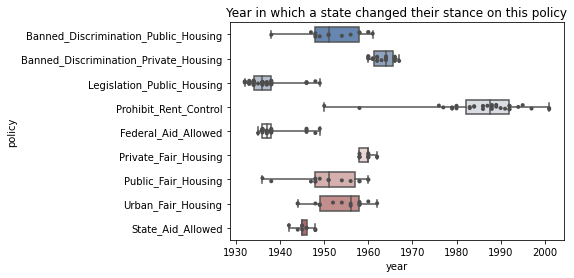

In [35]:
sns.boxplot(x='year',y='policy',data = years_of_change,whis=[0,100],width=.6,palette='vlag')
sns.stripplot(x='year',y= 'policy',data = years_of_change,size=4,color=".3",linewidth=0)
plt.title('Year in which a state changed their stance on this policy')

### Interpretation of Policy Changes
It appears that there are two periods in which the policies changed. around the 1930's, when the state adopted legislation allowing public housing and the state allows federal aid contribution to houing.
Around the mid-1950's, policies that banned discrimination in public housing, and adopted fair housing laws in public, private, and urban housing. 

When it comes to prohibiting rent control, this appears to be a more modern policy passed after the 1970's, with only two states prohibiting in the past (Kansas and Connecticut)

* This is useful, since it tells us that if we want to look at data pre-1960s vs post-1960s, we might be able to observe the biggest impact of changes in public policy.

Text(0.5, 1.0, 'State embracement of public policies')

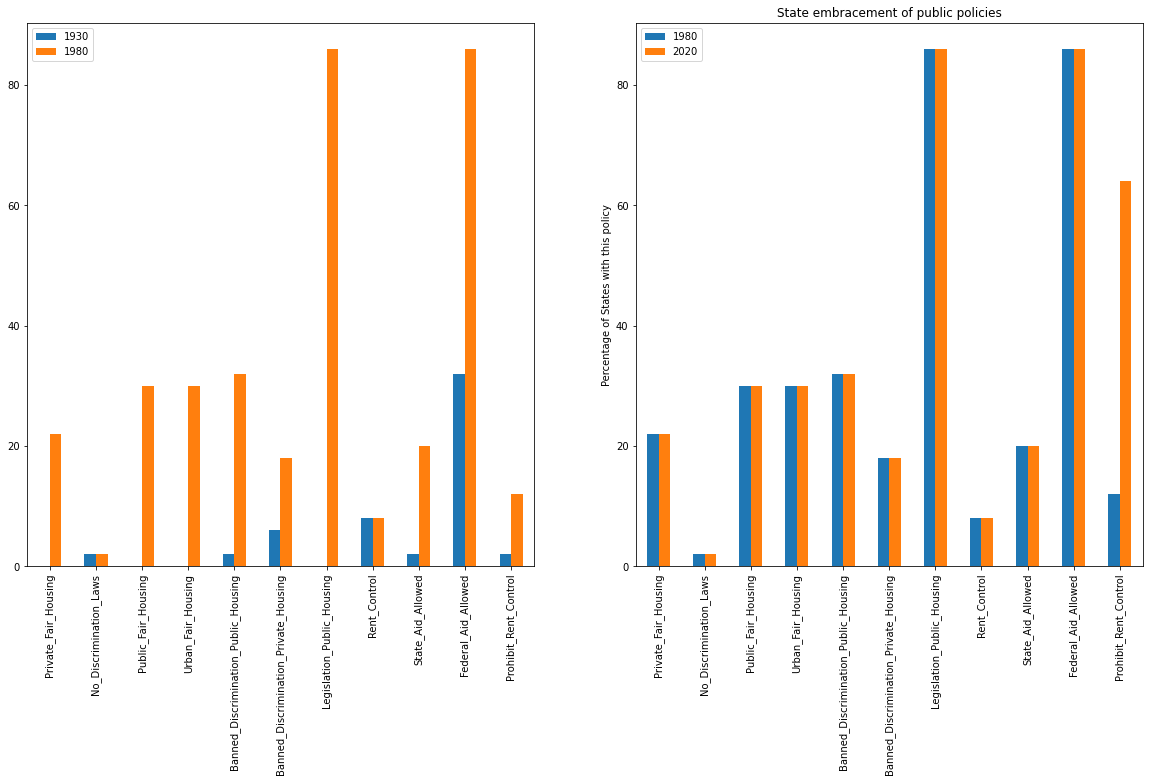

In [36]:
figgy,axes = plt.subplots(nrows=1,ncols=2)
figgy.set_figheight(10)
figgy.set_figwidth(20)

policy_count = pd.DataFrame(index=cat_cols,columns=['1930','1980','2020'])

count_tab =  df.loc[df['Year']==1930,cat_cols].apply(pd.Series.value_counts)
policy_count['1930'] = count_tab.loc[1.0] / 50 * 100

count_tab =  df.loc[df['Year']==1980,cat_cols].apply(pd.Series.value_counts)
policy_count['1980'] = count_tab.loc[1.0] / 50 * 100

count_tab =  df.loc[df['Year']==2020,cat_cols].apply(pd.Series.value_counts)
policy_count['2020'] = count_tab.loc[1.0] / 50 * 100


policy_count[['1930','1980']].plot.bar(ax=axes[0])
plt.ylabel('Percentage of States with this policy') ; plt.title('State embracement of public policies')


policy_count[['1980','2020']].plot.bar(ax=axes[1])
plt.ylabel('Percentage of States with this policy') ; plt.title('State embracement of public policies')

The figure above shows that policies changed drastically between 1930 and 1980, but between 1980 and 2020 the only policy that changed at the state level has to do with rent control prohibition. 


* ACTUALLY THIS IS WRONG: THE DATA WAS COLLECTED UNTIL THE 1960, AND WE PADDED WITH WHAT THE LAST POLICY WAS. SHOULD WE TRY TO FIND OTHER DATASETS?


After chattign with the team, decided to only focus on data after 2006. 

### Rent Control related to Continuous Data


<AxesSubplot:xlabel='Year', ylabel='Number_Interest_Groups'>

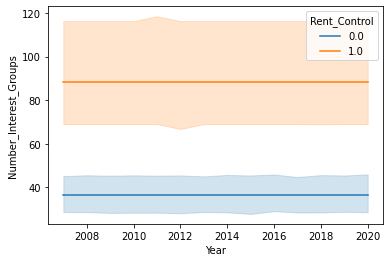

In [87]:
sns.lineplot(x='Year',y='Number_Interest_Groups',data=df[df['Year']>2006],hue='Rent_Control')

States that have enacted rent control policies have a much higher quantity of number interest groups.

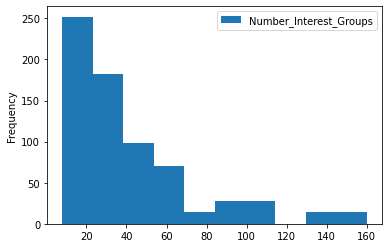

In [77]:
df[df['Year']>2006].plot.hist(y = 'Number_Interest_Groups')

yy = df.groupby('State')['Number_Interest_Groups'].transform(lambda x: x - x.mean())

There is a wide range distrubtion of number of interest groups in the 2006.